<a href="https://colab.research.google.com/github/sanjoy-kumar/Machine-Learning/blob/main/Gradiant_Decent_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**
--------------------------


**Introduction**
---------------




Linear regression is a linear approach to modelling the relationship between a scalar response (dependent variable or traget value) and one or more explanatory variables(independent variables). It is used when we want to predict the value of a variable based on the value of another variable. 


**EDA**
-------


**Mean:**

The mean, also known as average or arithmetic average, is a central value of a finite set of numbers: specifically, the sum of the values divided by the number of values. The mean of a set of numbers x1, x2, ..., xn is typically denoted by x̄ or μ.


**Standard Deviation:**

The standard deviation is a summary measure of the differences of each observation from the mean. 

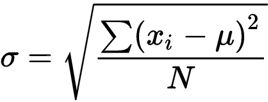


**Standardization:**

Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.

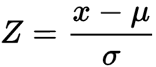

Where,

Z = standard score

x = observed value

μ = mean of the sample

σ = standard deviation of the sample


**Implementation Steps:**
-----------------------


**Importing Libaries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


**Standarization Function:**

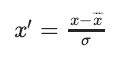

In [42]:
def standarized_data(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    X_std = np.std(X)
    Y_std = np.std(Y)
    x = (X-X_mean)/X_std
    y = (Y-Y_mean)/Y_std
    return x,y

**Compute Error or Cost Function:**

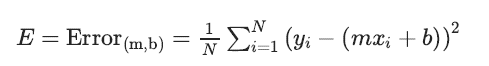

In [43]:
def compute_cost_function(b,m,points):
    totalError = 0
    for i in range(0, len(points)):
      x = points[i, 0]
      y = points[i, 1]
      totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))
    

**Gradiant Decent Function and Updating m & b :**


Gradiant Partial Derivatives

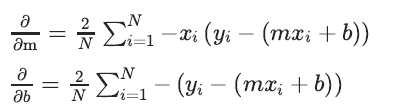


Updating m and b using learning rate (Step Size):

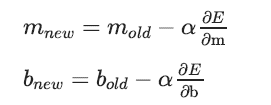


In [44]:
def gradient_partial_derivatives_and_updating_m_b(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]
    

**Without Normalization:**

In [45]:
def without_normalization_data(initial_m,initial_b,learning_rate,number_iterations):

  #-------------------- Data read from csv file -----------------------------------------------
  
  data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")
  X_input = data['Midterm mark']
  target = data['Final mark'] 


  # --------------- Show the datapoints from student marks data set ------------------------

  plt.scatter(X_input,target)
  plt.xlabel('Mid-term Mark')
  plt.ylabel('Final Mark')
  
  #------------------ Show the initial regression line on the same figure (m = −0.5 , b = 0 )----

  Y = initial_m * X_input + initial_b
  plt.plot(X_input, Y, '-r')
  plt.grid()
  plt.show()




  # ---------------Create a new graph showing Error at each iteration (from initial point to iteration 100).
  # x-axis is iteration number and y-axis is Error
  
  xe= []
  ye=[]
  update_m = initial_m
  update_b = initial_b
  data = np.array(data)

  for i in range(number_iterations):
    xe.append(i)
    [b, m] = gradient_partial_derivatives_and_updating_m_b(update_b, update_m, data, learning_rate)
    update_b = b
    update_m = m
    errorOut = compute_cost_function(b,m,data)
    ye.append(errorOut)

# ----------------- Update b and m & N(100,2000... etc) times, and create another figure showing the regression line--------

  print("After {0} iterations: b = {1}".format(number_iterations,b))
  print("After {0} iterations: m = {1}".format(number_iterations,m))
  plt.scatter(X_input,target)
  plt.xlabel('Mid-term Mark')
  plt.ylabel('Final Mark')
  Y = m * X_input + b
  plt.plot(X_input, Y, '-r')
  plt.grid()
  plt.show()

# ---------------Create a new graph showing Error at each iteration ---------------------------
  print("Last Error Value: ",errorOut)
  plt.scatter(xe,ye)
  plt.xlabel('Iteration Number')
  plt.ylabel('Error')
  plt.show()



**With Normalization Data:**

In [46]:
def with_normalization_data(initial_m,initial_b,learning_rate,number_iterations):

  #-------------------- Data read from csv file -----------------------------------------------
  
  data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv", delimiter = ",")
  X_value = data['Midterm mark']
  Y_value = data['Final mark'] 
  X_input,target = standarized_data(X_value,Y_value)
  data['Midterm mark'] = X_input
  data['Final mark'] = target


  # --------------- Show the datapoints from student marks data set ------------------------

  plt.scatter(X_input,target)
  plt.xlabel('Mid-term Mark')
  plt.ylabel('Final Mark')
  
  #------------------ Show the initial regression line on the same figure (m = −0.5 , b = 0 )----

  Y = initial_m * X_input + initial_b
  plt.plot(X_input, Y, '-r')
  plt.grid()
  plt.show()

   
  # ---------------Create a new graph showing Error at each iteration (from initial point to iteration 100).
  # x-axis is iteration number and y-axis is Error

   
  xe= []
  ye=[]
  update_m = initial_m
  update_b = initial_b
  data = np.array(data)


  for i in range(number_iterations):
    xe.append(i)
    [b, m] = gradient_partial_derivatives_and_updating_m_b(update_b, update_m, data, learning_rate)
    update_b = b
    update_m = m    
    errorOut = compute_cost_function(b,m,data)
    ye.append(errorOut)

 # ------ Update b and m & N(100,2000... etc) times, and create another figure showing the regression line------------

  print("After {0} iterations: b = {1}".format(number_iterations,b))
  print("After {0} iterations: m = {1}".format(number_iterations,m))
  plt.scatter(X_input,target)
  plt.xlabel('Mid-term Mark')
  plt.ylabel('Final Mark')
  Y = m * X_input + b
  plt.plot(X_input, Y, '-r')
  plt.grid()
  plt.show()

# ---------------Create a new graph showing Error at each iteration --------------------
  print("Last Error Value: ",errorOut)
  plt.scatter(xe,ye)
  plt.xlabel('Iteration Number')
  plt.ylabel('Error')
  plt.show()


**Results**
-------------


**Case -1:**
---------------------

With standardiztion (initial value of m,b and 100 equations or iterations)

Learning rate = 0.0001 , m =-0.5 , b = 0 and Iterations = 100



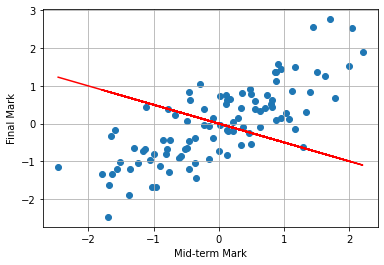

After 100 iterations: b = -1.9754337055033484e-17
After 100 iterations: m = -0.4747809463889036


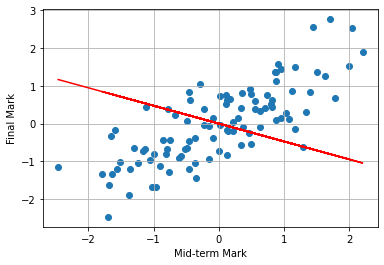

Last Error Value:  1.9598823170828026


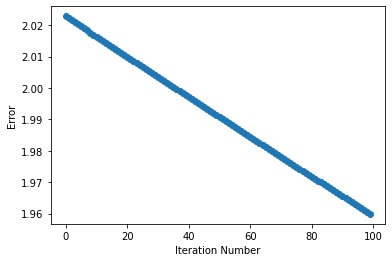

In [47]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.0001
    number_iterations =100
    with_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case -2:**
---------------------

Without standardiztion (initial value of m,b and 100 equations or iterations)

Learning rate = 0.0001 , m =-0.5 , b = 0 and Iterations = 100

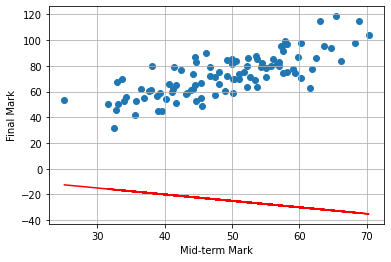

After 100 iterations: b = 0.04490536397288714
After 100 iterations: m = 1.4785727560143909


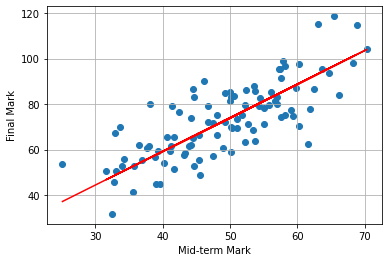

Last Error Value:  112.7607224756124


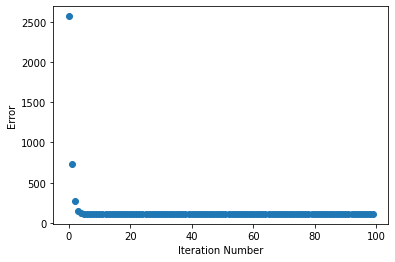

In [48]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.0001
    number_iterations =100
    without_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case -3:**
---------------------

With standardiztion (initial value of m,b and 2000 equations or iterations)

Learning rate = 0.0001 , m =-0.5 , b = 0 and Iterations = 2000



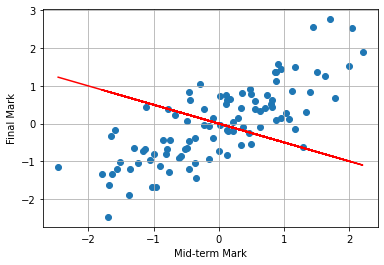

After 2000 iterations: b = -3.0465734102147507e-16
After 2000 iterations: m = -0.08012563486637701


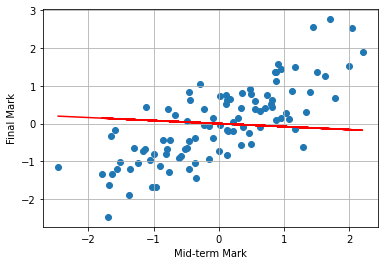

Last Error Value:  1.130370971980073


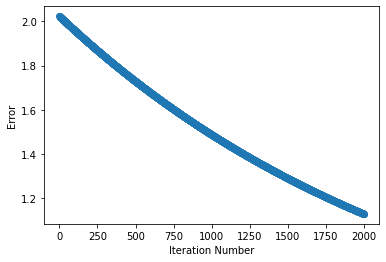

In [49]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.0001
    number_iterations =2000
    with_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case -4:**
---------------------

Without standardiztion (initial value of m,b and 2000 equations or iterations)

Learning rate = 0.0001 , m =-0.5 , b = 0 and Iterations = 2000

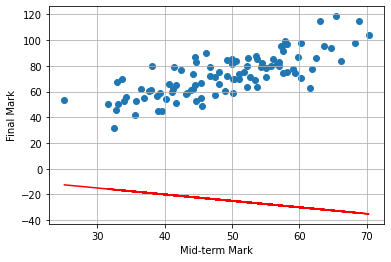

After 2000 iterations: b = 0.15833790708442708
After 2000 iterations: m = 1.4763433036607632


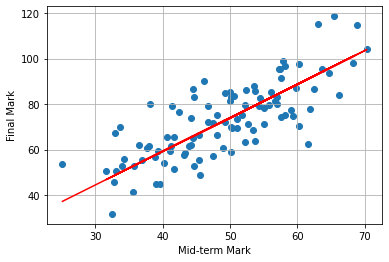

Last Error Value:  112.69297466342672


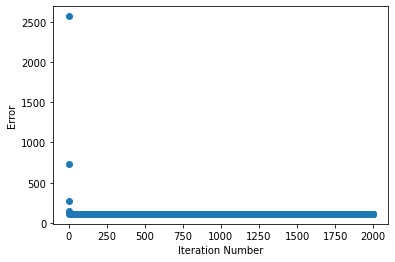

In [50]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.0001
    number_iterations =2000
    without_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case - 5:**
-------------

Standardized with scikit python


[[1.32199232]] [8.01157814]


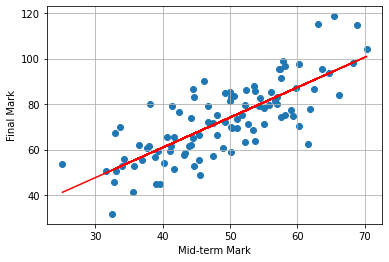

In [51]:
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv", delimiter = ",")
x = np.array(data['Midterm mark']).reshape(-1,1) 
y = np.array(data['Final mark']).reshape(-1,1) 

model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)
print(model.coef_,model.intercept_)
Y = model.coef_ * x + model.intercept_

plt.scatter(x,y)
plt.plot(x,Y,'-r')
plt.xlabel('Mid-term Mark')
plt.ylabel('Final Mark')
plt.grid()
plt.show()

**Case -6:**
-------------

With standardiztion (initial value of m,b and 100 equations or iterations)

Learning rate = 0.1 , m =-0.5 , b = 0 and Iterations = 100

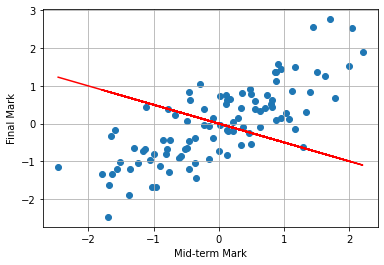

After 100 iterations: b = -6.080639464167702e-16
After 100 iterations: m = 0.7734781433087617


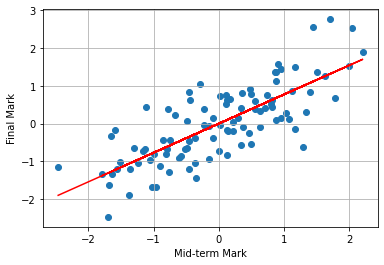

Last Error Value:  0.40173156142233113


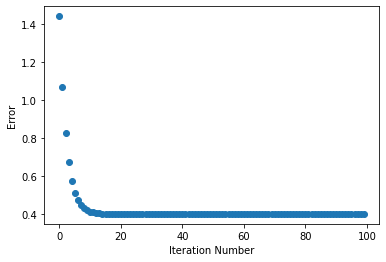

In [52]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.1
    number_iterations =100
    with_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case -7:**
-----------------

Without standardiztion (initial value of m,b and 100 equations or iterations)

Learning rate = 0.1 , m =-0.5 , b = 0 and Iterations = 100

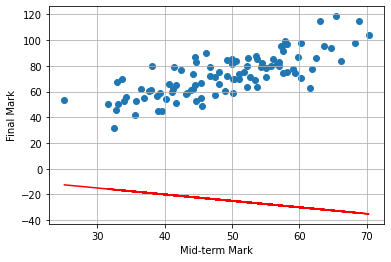

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


After 100 iterations: b = -1.8207268088133824e+268
After 100 iterations: m = -9.263695270230228e+269


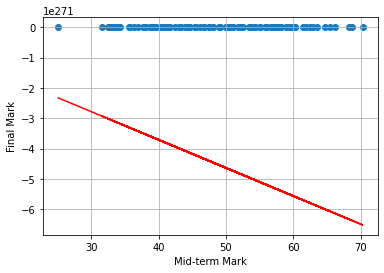

Last Error Value:  inf


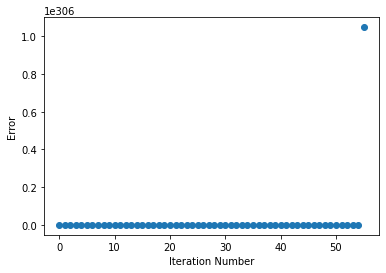

In [53]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.1
    number_iterations =100
    without_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case -8:**
-------------

With standardiztion (initial value of m,b and 2000 equations or iterations)

Learning rate = 0.1 , m =-0.5 , b = 0 and Iterations = 2000

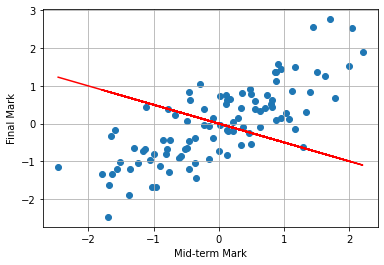

After 2000 iterations: b = -6.408502201127318e-16
After 2000 iterations: m = 0.7734781435681737


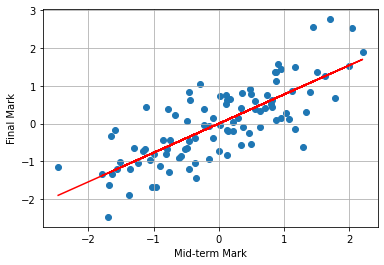

Last Error Value:  0.4017315614223312


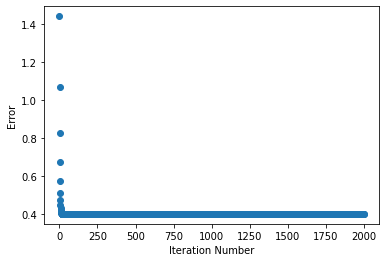

In [54]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.1
    number_iterations =2000
    with_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Case -9:**
-------------

Without standardiztion (initial value of m,b and 2000 equations or iterations)

Learning rate = 0.1 , m =-0.5 , b = 0 and Iterations = 2000


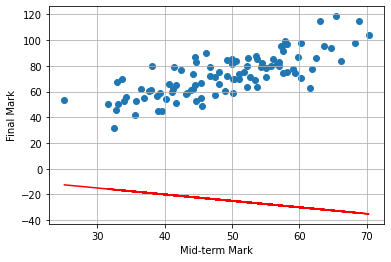

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


After 2000 iterations: b = nan
After 2000 iterations: m = nan


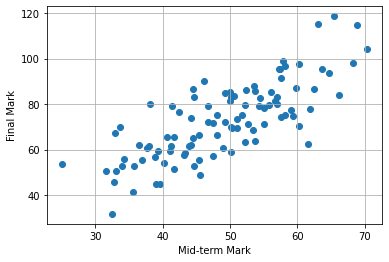

Last Error Value:  nan


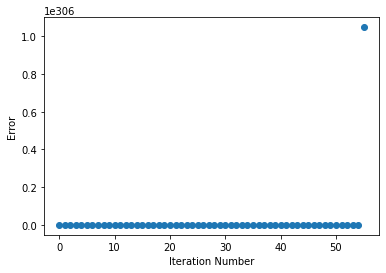

In [55]:
def run():

    initial_m = -0.5
    initial_b = 0
    learning_rate = 0.1
    number_iterations =2000
    without_normalization_data(initial_m,initial_b,learning_rate,number_iterations)



if __name__ == '__main__':
    run()

**Conclusion**
-----------------

When step size or learning rate(alpha) is increased (for example 0.0001 to 0.1) cost of function or error will be nan (not a number) or inf (ininity) after 50 iterations for non-standarized data. That is why the regression line will be out of domain for non-standarized data (See Case-7 & Case-9).


